# Olympic Data Analysis - Data Cleaning and EDA

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
os.getcwd()

'/Users/carlynreed'

In [11]:
os.chdir('/Users/carlynreed/Desktop/Data Analysis with Python/Olympic Data/')

In [12]:
os.getcwd()

'/Users/carlynreed/Desktop/Data Analysis with Python/Olympic Data'

In [18]:
#downloaded data from https://www.kaggle.com/heesoo37/120-y...
olympic_data = pd.read_csv('athlete_events.csv', index_col='ID')

In [19]:
olympic_data.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Here we can see the first five rows of the Olympic Data.

In [26]:
np.shape(olympic_data)

(271116, 14)

In [32]:
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [31]:
olympic_data.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


271116 columns and 14 rows are in this data set.

In [20]:
print(olympic_data.columns) #prints each column name

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


In [36]:
missing_values = olympic_data.isna().sum() #what's the totla number of missing values in each column
print(missing_values)

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [337]:
missing_values_table = missing_values.reset_index(drop = False)
missing_values_table = missing_values.rename(columns={"index": "Columns", 0:"Value"})
missing_values_table['Percentage'] = (missing_values['Value']/len(olympic_data))*100
missing_values_table = missing_values[missing_values.Value !=0]
missing_values_table

,Columns,Value,percentage
0,Medal,231333,85.326207
1,Weight,62875,23.191180
2,Height,60171,22.193821
3,Age,9474,3.494445


Text(0.5, 1.0, 'Percent of Missing Data')

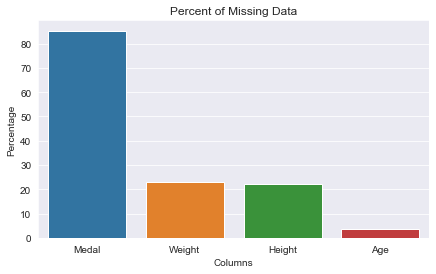

In [160]:
plt.figure(figsize=(7,4))
sns.barplot(x='Columns', y='percentage', data=missing_values_table)
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percent of Missing Data')

In [361]:
olympic_data['Medal'] = olympic_data['Medal'].fillna('No Medal')

In [362]:
olympic_data.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex Code
ID,,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,1
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,1
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,1
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0


In [95]:
olympic_data.isnull().sum()

Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

In [102]:
duplicates = olympic_data.duplicated()
duplicates.value_counts()

False    269731
True       1385
dtype: int64

In [109]:
duplicates_df = olympic_data.loc[duplicates]
duplicates_df.head(15)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",No Medal
2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",No Medal
2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",No Medal
2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",No Medal
2777,Hermann Reinhard Alker,M,51.0,NaN,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",No Medal
2903,Lucien Charles Edouard Alliot,M,46.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,No Medal
2903,Lucien Charles Edouard Alliot,M,46.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,No Medal
4319,Ludwig Angerer,M,41.0,NaN,NaN,Germany,GER,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal


Since Athletes can compete in multiple events, we aren't too worried about duplicated names.

In [111]:
duplicates_df['Sport'].value_counts()

Art Competitions    1315
Sailing               37
Cycling               32
Equestrianism          1
Name: Sport, dtype: int64

The sports with the most duplicated values are Art competitions, Sailing, and Cycling.

Text(0.5, 1.0, 'Number of Duplicate Participants')

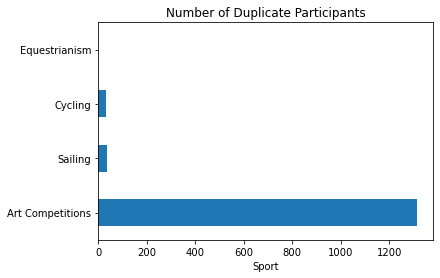

In [118]:
duplicates_df.Sport.value_counts().plot(kind='barh')
plt.xlabel('Sport')
plt.title('Number of Duplicate Participants')

In [216]:
olympic_data['Height'].describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

Who was the tallest olympian?

In [346]:
height_max = olympic_data['Height'].max()
height_min = olympic_data['Height'].min()

In [343]:
olympic_data[olympic_data['Height']==height_max]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex Code
ID,,,,,,,,,,,,,,,
132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,No Medal,1
132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,No Medal,1
132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,No Medal,1


Who was the shortest olympian?

In [347]:
olympic_data[olympic_data['Height']==height_min]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex Code
ID,,,,,,,,,,,,,,,
15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,No Medal,0
15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,No Medal,0
15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,No Medal,0
15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,No Medal,0
15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,No Medal,0
15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Balance Beam,No Medal,0
82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,No Medal,1


What's the total of male and female athletes?

In [205]:
olympic_data['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Total Male vs Female Athletes'}, xlabel='Sex', ylabel='count'>

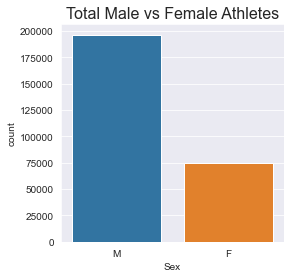

In [364]:
plt.figure(figsize=(4,4))
plt.title('Total Male vs Female Athletes', fontsize=16)
sns.countplot(x='Sex', data=olympic_data)

In which year did Female athletes start competing in the olympics?

In [312]:
olympic_data[olympic_data['Sex']=='F']['Year'].value_counts(ascending=True).head()

1906    11
1904    16
1900    33
1908    47
1912    87
Name: Year, dtype: int64

Female athletes first competed in the 1906 olympics. 11 Athletes competed.

Text(0.5, 0, 'Height (cm)')

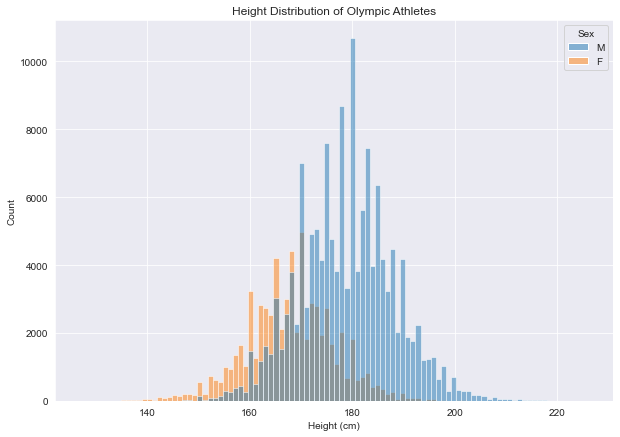

In [161]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
sns.histplot(data=olympic_data, x='Height',bins = 100, hue='Sex')
plt.title('Height Distribution of Olympic Athletes')
plt.xlabel('Height (cm)')

Text(0.5, 0, 'Weight')

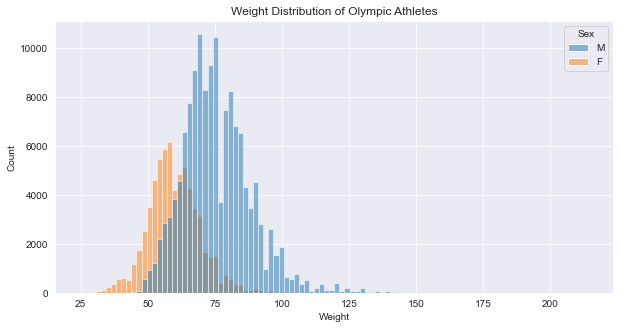

In [142]:
plt.figure(figsize=(10,5))
sns.histplot(data=olympic_data, x='Weight',bins = 100, hue='Sex')
plt.title('Weight Distribution of Olympic Athletes')
plt.xlabel('Weight')

<AxesSubplot:xlabel='Weight', ylabel='Height'>

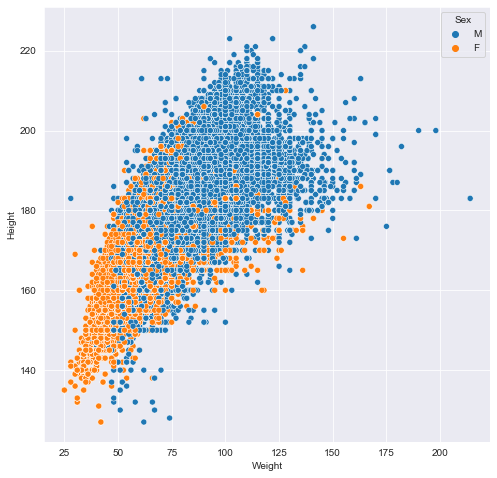

In [144]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Weight', y='Height', data=olympic_data, hue='Sex')

Is there a correlation between the height and weight of athletes?

In [145]:
olympic_data['Height'].corr(olympic_data['Weight'])

0.7962130921162259

There is a moderatley strong positive linear relationship between height and weight.
Let's see if there's a relationship between sex, weight, and height.

In [154]:
Sex_values = {'F':0, 'M':1}
olympic_data['Sex Code'] = olympic_data['Sex'].map(Sex_values) #create numeric code for sex values
olympic_data.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex Code
ID,,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,1
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,1
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,1
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,0


<AxesSubplot:title={'center':'Correlation Between Variables'}>

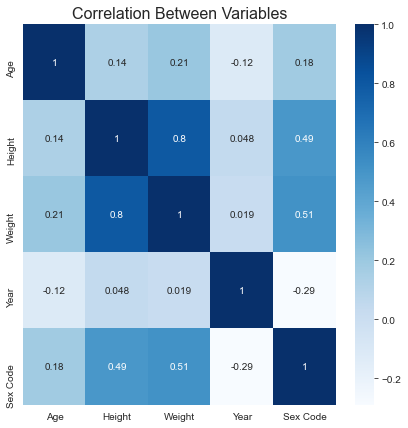

In [349]:
plt.figure(figsize=(7,7))
plt.title('Correlation Between Variables', fontsize=16)
sns.heatmap(olympic_data.corr(), annot=True, cmap='Blues')

This heat map shows weight and height are the most correlated variables in this data set with their being a moderate correlation between weight, height, and sex. 

<AxesSubplot:title={'center':'Age Distribution of Athletes'}, xlabel='Age', ylabel='Count'>

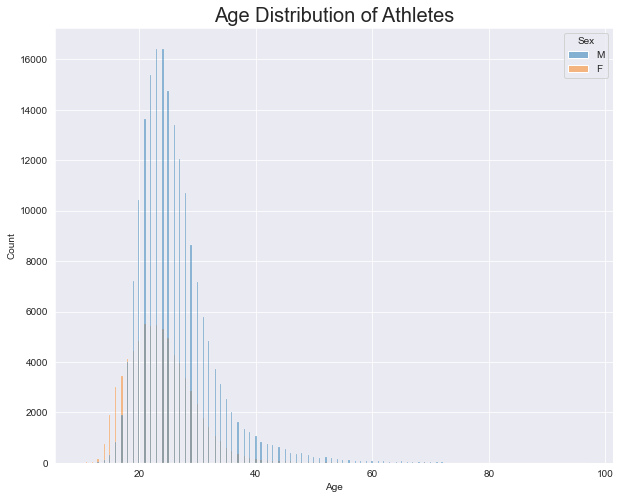

In [365]:
plt.figure(figsize=(10,8))
plt.title('Age Distribution of Athletes', fontsize=20)
plt.xlabel('Age')
sns.histplot(data=olympic_data, x='Age', hue='Sex')

<AxesSubplot:xlabel='Age'>

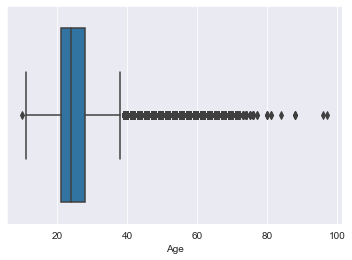

In [182]:
sns.boxplot(x='Age', data = olympic_data)

<AxesSubplot:title={'center':'Olympic Medalist Ages'}, xlabel='Medals', ylabel='Age'>

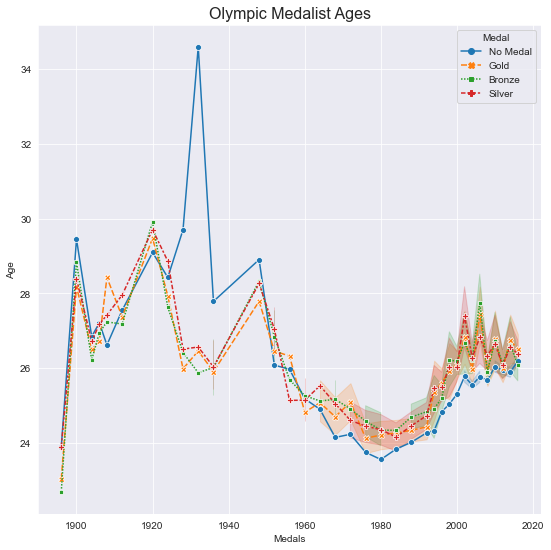

In [350]:
plt.figure(figsize=(9,9))
plt.title('Olympic Medalist Ages', fontsize=16)
plt.xlabel('Medals')
plt.ylabel('Age')
sns.lineplot(x='Year', y='Age', hue='Medal', data =olympic_data, style='Medal', markers=True)

<AxesSubplot:title={'center':'Male vs Female Olympian Age'}, xlabel='Year', ylabel='Age'>

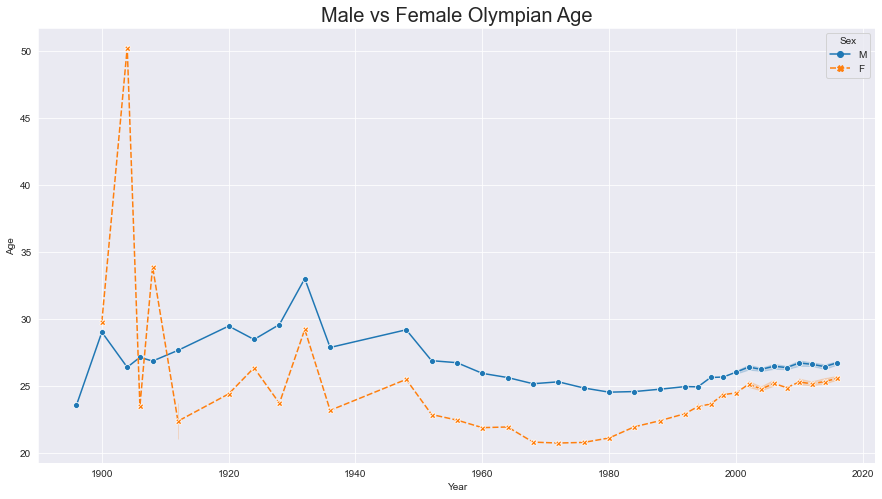

In [203]:
plt.figure(figsize=(15,8))
plt.title('Male vs Female Olympian Age', fontsize=20)
sns.lineplot(x='Year', y='Age', hue = 'Sex', data=olympic_data, style='Sex', markers=True)

It would be interesting to explore why female olympic athlete ages were much older in 1906. 

In [356]:
olympic_data.groupby('Year')['Name'].nunique().sort_values(ascending=False).head()

Year
2016    11174
1992    11172
2008    10880
2000    10639
2004    10537
Name: Name, dtype: int64

The olympic year with the most participants was 1992 with 11174 participants.

In [234]:
olympic_medals = olympic_data.groupby('Team')['Medal'].count()

In [235]:
olympic_medals.sort_values(ascending=False)

Team
United States     17847
France            11988
Great Britain     11404
Italy             10260
Germany            9326
                  ...  
Formosa               1
Plume-patte-32        1
Pop Art               1
Satchmo               1
Souvenance            1
Name: Medal, Length: 1184, dtype: int64

The team that has won the most medals over the course of the olympics is United States. 

([<matplotlib.patches.Wedge at 0x7fe97afc85b0>,
 [Text(0.6648327036287203, 0.8763546520591572, 'United States'),
  Text(-0.8561373764282495, 0.6906727102488952, 'France'),
  Text(-0.9494447156738369, -0.5554770309193955, 'Great Britain'),
  Text(0.0851651154210683, -1.096698182325163, 'Italy'),
  Text(0.9748371016041789, -0.5096004565696187, 'Germany')],
 [Text(0.3626360201611201, 0.4780116283959039, '29.34'),
  Text(-0.46698402350631785, 0.3767305692266701, '19.71'),
  Text(-0.5178789358220929, -0.30298747141057936, '18.75'),
  Text(0.04645369932058271, -0.5981990085409978, '16.87'),
  Text(0.5317293281477339, -0.27796388540161016, '15.33')])

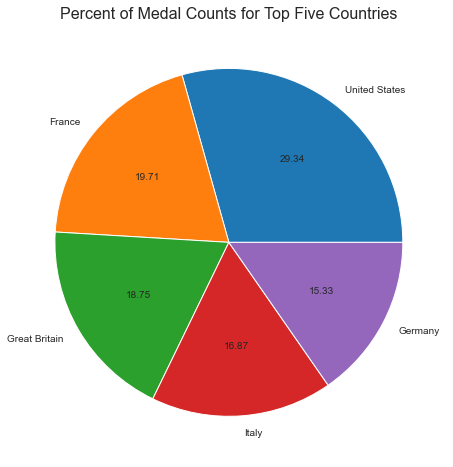

In [252]:
Top_5_Countries = olympic_medals.sort_values(ascending=False).head()
Top_5_indicies = olympic_medals.sort_values(ascending=False).head().index
plt.figure(figsize=(8,8))
plt.title('Percent of Medal Counts for Top Five Countries', fontsize=16)
plt.pie(Top_5_Countries, labels=Top_5_indicies, autopct="%.2f")

<AxesSubplot:title={'center':'Top 5 Countries with the Most Medals'}, xlabel='Team', ylabel='Number of Medals'>

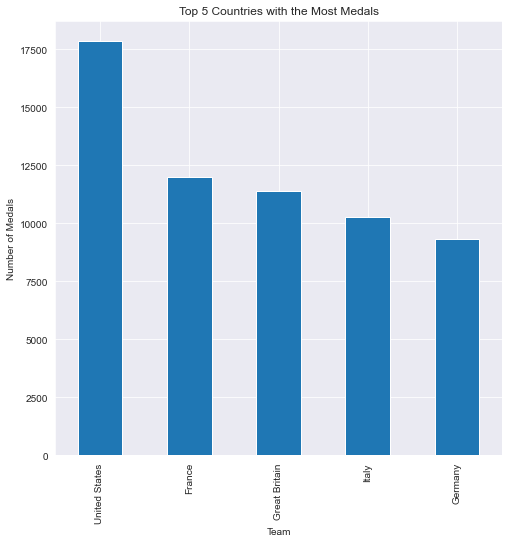

In [251]:
plt.figure(figsize=(8,8))
plt.title('Top 5 Countries with the Most Medals')
plt.xlabel('Countries')
plt.ylabel('Number of Medals')
Top_5_Countries.plot(kind='bar')

What are the total medals won in olympic history?

In [318]:
olympic_data['Medal'].value_counts()

No Medal    231333
Gold         13372
Bronze       13295
Silver       13116
Name: Medal, dtype: int64

Which sports has the US won the most gols in?

In [290]:
gold_us_df = olympic_data[(olympic_data['Team'] =='United States') & (olympic_data['Medal']=='Gold')]

In [294]:
gold_us_sports = gold_us_df['Sport'].value_counts()

<AxesSubplot:>

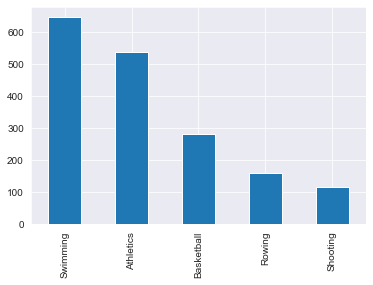

In [298]:
gold_us_sports.head().plot(kind='bar')

In [304]:
gold_us_df[['Sport', 'Medal']].value_counts().head()

Sport       Medal
Swimming    Gold     645
Athletics   Gold     537
Basketball  Gold     281
Rowing      Gold     160
Shooting    Gold     117
dtype: int64

Which olympians have won the most golds and in which sport

In [316]:
olympic_data[olympic_data['Medal']=='Gold'].value_counts(['Name', 'Team', 'Sport']).head()

Name                                Team           Sport     
Michael Fred Phelps, II             United States  Swimming      23
Raymond Clarence "Ray" Ewry         United States  Athletics     10
Mark Andrew Spitz                   United States  Swimming       9
Paavo Johannes Nurmi                Finland        Athletics      9
Larysa Semenivna Latynina (Diriy-)  Soviet Union   Gymnastics     9
dtype: int64

Who was the heaviest athlete?

In [254]:
olympic_data['Weight'].max()

214.0

In [256]:
olympic_data[olympic_data['Weight']==214]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex Code
ID,,,,,,,,,,,,,,,
12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,No Medal,1
12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,No Medal,1


Which olympian has compted the most?

In [257]:
olympic_data['Name'].value_counts()

Robert Tait McKenzie                58
Heikki Ilmari Savolainen            39
Joseph "Josy" Stoffel               38
Ioannis Theofilakis                 36
Takashi Ono                         33
                                    ..
Michael O'Donel Bjarne Alexander     1
Erik Jensen                          1
Olga Ivn Ruyol Fernndez              1
Douglas James "Doug" Kern            1
Alex Feneridis                       1
Name: Name, Length: 134732, dtype: int64

In [357]:
most_olympics_athlete = olympic_data[olympic_data.Name=='Robert Tait McKenzie']

In [358]:
most_olympics_athlete.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex Code
ID,,,,,,,,,,,,,,,
77710,Robert Tait McKenzie,M,44.0,NaN,NaN,Canada,CAN,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,No Medal,1
77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No Medal,1
77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No Medal,1
77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No Medal,1
77710,Robert Tait McKenzie,M,60.0,NaN,NaN,Canada,CAN,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No Medal,1


Which Event(s) did McKenzie compete in?

In [359]:
most_olympics['Event'].value_counts()

Art Competitions Mixed Sculpturing, Unknown Event         48
Art Competitions Mixed Sculpturing, Statues                7
Art Competitions Mixed Sculpturing, Medals And Reliefs     1
Art Competitions Mixed Sculpturing, Medals                 1
Art Competitions Mixed Sculpturing                         1
Name: Event, dtype: int64

How many medals has McKenzie won?

In [265]:
most_olympics['Medal'].value_counts()

No Medal    57
Bronze       1
Name: Medal, dtype: int64

Who was the oldest athlete to compete in the olympics?

In [266]:
olympic_data['Age'].max()

97.0

In [267]:
olympic_data[olympic_data.Age==97]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex Code
ID,,,,,,,,,,,,,,,
128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",No Medal,1


John Quincy Adams Ward was the oldest athlete to compete at 97 years old in the 1928 Summer Olympics

Who was the youngest olympian?

In [268]:
olympic_data['Age'].min()

10.0

In [269]:
olympic_data[olympic_data.Age==10]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex Code
ID,,,,,,,,,,,,,,,
71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,1


Dimitrios Loundras was the youngest olympian at 10 years old competing in the 1896 Summer Olympics. 

How young was the youngest Female athlete?

In [274]:
female_olympians = olympic_data[olympic_data.Sex == 'F']
female_olympians.sort_values(by='Age', ascending=True).head()


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex Code
ID,,,,,,,,,,,,,,,
22411,Magdalena Cecilia Colledge,F,11.0,152.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,No Medal,0
52070,Etsuko Inada,F,11.0,NaN,NaN,Japan,JPN,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Figure Skating,Figure Skating Women's Singles,No Medal,0
47618,"Sonja Henie (-Topping, -Gardiner, -Onstad)",F,11.0,155.0,45.0,Norway,NOR,1924 Winter,1924,Winter,Chamonix,Figure Skating,Figure Skating Women's Singles,No Medal,0
126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 100 metres Breaststroke,No Medal,0
118925,Megan Olwen Devenish Taylor (-Mandeville-Ellis),F,11.0,157.0,NaN,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,No Medal,0


In [275]:
female_olympians['Age'].value_counts()

21.0    5511
23.0    5447
22.0    5416
24.0    5291
25.0    4950
        ... 
72.0       3
66.0       3
59.0       3
67.0       1
73.0       1
Name: Age, Length: 62, dtype: int64

The youngest female olympians were 11 years old. Most female olympians are around 21-24 years old. 

Which sports did the 11 year old female athletes compete in?

In [277]:
olympic_data[olympic_data.Age==11]['Sport'].value_counts()

Figure Skating    7
Swimming          4
Gymnastics        1
Rowing            1
Name: Sport, dtype: int64

Most 11 year old female olympians competed in Figure skating.

Which teams had the most 11 year old athletes?

In [279]:
olympic_data[olympic_data.Age==11]['Team'].value_counts()

Puerto Rico      4
Great Britain    2
Norway           1
Spain            1
Italy            1
Japan            1
China            1
Romania          1
South Africa     1
Name: Team, dtype: int64

In [282]:
olympic_data[(olympic_data.Age==11)]['Medal']

ID
22411     No Medal
37333     No Medal
40129       Silver
47618     No Medal
51268     No Medal
52070     No Medal
70616     No Medal
76675     No Medal
118925    No Medal
126307    No Medal
126307    No Medal
126307    No Medal
126307    No Medal
Name: Medal, dtype: object

In [284]:
olympic_data[(olympic_data.Age==11) & (olympic_data.Medal == 'Silver')]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Sex Code
ID,,,,,,,,,,,,,,,
40129,Luigina Giavotti,F,11.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver,0


Only Luigina Giavotti won a medal as an 11 year old female athlete.

What are the most played sport in olympic history?

In [322]:
most_played_sports = olympic_data['Sport'].value_counts()

In [323]:
most_played_sports.head()

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64

<AxesSubplot:>

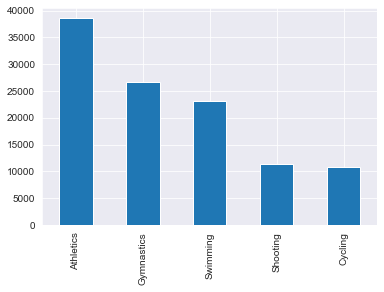

In [326]:
most_played_sports.head().plot(kind= 'bar')

What are the most played athletics sports?

In [334]:
most_played_athletics_sports = olympic_data[olympic_data['Sport']=='Athletics']['Event'].value_counts([])

In [335]:
most_played_athletics_sports.head()

Athletics Men's Marathon                2093
Athletics Men's 100 metres              1936
Athletics Men's 4 x 100 metres Relay    1910
Athletics Men's 4 x 400 metres Relay    1749
Athletics Men's 200 metres              1495
Name: Event, dtype: int64

<AxesSubplot:>

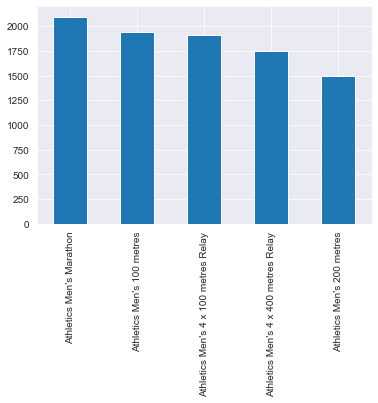

In [336]:
most_played_athletics_sports.head().plot(kind='bar')

We could continue to do EDA on this data set. Explore specific country stats or maybe dig into the history of specific sports more.